# <b> 1.  REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/2_OWN_CAR_AGE(fillna).csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/2_OWN_CAR_AGE(fillna).csv'

In [ ]:
df.shape

# MISSING VALUES BETWEEN 0-10%

In [ ]:
missing_threshold_min = 1  # Greater than 0
missing_threshold_max = 0.15 * len(df)
columns_with_missing = df.columns[(df.isnull().sum() > missing_threshold_min) & (df.isnull().sum() < missing_threshold_max)].tolist()

print("Columns with missing values greater than 0 but less than 10%:")
print(columns_with_missing)

Columns with missing values greater than 0 but less than 10%:
['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [ ]:
(df[columns_with_missing].isnull().sum()/df.shape[0]*100).sort_values(ascending = False).head(50)

AMT_REQ_CREDIT_BUREAU_HOUR    13.494982
AMT_REQ_CREDIT_BUREAU_DAY     13.494982
AMT_REQ_CREDIT_BUREAU_WEEK    13.494982
AMT_REQ_CREDIT_BUREAU_MON     13.494982
AMT_REQ_CREDIT_BUREAU_QRT     13.494982
AMT_REQ_CREDIT_BUREAU_YEAR    13.494982
NAME_TYPE_SUITE                0.419796
OBS_30_CNT_SOCIAL_CIRCLE       0.331281
DEF_30_CNT_SOCIAL_CIRCLE       0.331281
OBS_60_CNT_SOCIAL_CIRCLE       0.331281
DEF_60_CNT_SOCIAL_CIRCLE       0.331281
EXT_SOURCE_2                   0.214779
AMT_GOODS_PRICE                0.090468
AMT_ANNUITY                    0.003905
CNT_FAM_MEMBERS                0.000651
dtype: float64

## HANDLING AMT_REQ_CREDIT_BUREAU COLUMNS

In [ ]:
columns=df[["AMT_REQ_CREDIT_BUREAU_HOUR" ,"AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT",
"AMT_REQ_CREDIT_BUREAU_YEAR"]].columns

In [ ]:
for i in columns:
  df[i+"_binary"] = df[i].fillna(0).apply(lambda x: 1 if x != 0 else 0)

In [ ]:
df[["AMT_REQ_CREDIT_BUREAU_HOUR_binary" ,"AMT_REQ_CREDIT_BUREAU_DAY_binary",
"AMT_REQ_CREDIT_BUREAU_WEEK_binary",
"AMT_REQ_CREDIT_BUREAU_MON_binary",
"AMT_REQ_CREDIT_BUREAU_QRT_binary",
"AMT_REQ_CREDIT_BUREAU_YEAR_binary"]]

,AMT_REQ_CREDIT_BUREAU_HOUR_binary,AMT_REQ_CREDIT_BUREAU_DAY_binary,AMT_REQ_CREDIT_BUREAU_WEEK_binary,AMT_REQ_CREDIT_BUREAU_MON_binary,AMT_REQ_CREDIT_BUREAU_QRT_binary,AMT_REQ_CREDIT_BUREAU_YEAR_binary
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
307287,1,0,0,0,0,1
307288,0,0,0,0,1,1
307289,1,0,0,1,0,1
307290,0,0,0,0,0,0


### DATA IS MISSING COMPLETELY AT RANDOM

Multiple Imputation by Chained Equations (MICE):

Method: Iteratively impute missing values for each variable conditional on other variables using a model.<br>
Pros: Captures relationships between variables, provides multiple imputations for uncertainty estimation.<br>
Cons: Computationally intensive.

In [ ]:
pip install miceforest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 830.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import miceforest as mf

In [ ]:
kds=mf.ImputationKernel(
    df[columns],
    datasets=5,
    save_all_iterations=True,
    random_state=11
)
kds.mice(6)

In [ ]:
df[columns]=pd.concat([kds.complete_data(i) for i in range(2)]).groupby(level=0).mean()
df[columns].head()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df[columns].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [ ]:
df.to_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/3_AMT_CREDIT_(fillna).csv", index=False)

# NAME_TYPE_SUITE: Who accompanied client when applying for the previous application

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/Munir.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248335
Family              40132
Spouse, partner     11363
Children             3267
Other_B              1769
Other_A               865
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

SELECTING COLUMNS RELATED TO NAME_TYPE_SUITE

In [ ]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [ ]:
copied_df = df.copy()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [ ]:
columns=["NAME_TYPE_SUITE","CNT_FAM_MEMBERS","CNT_CHILDREN",
"NAME_FAMILY_STATUS",
"AMT_INCOME_TOTAL",
"NAME_EDUCATION_TYPE",
"DAYS_EMPLOYED",
"DAYS_BIRTH",
"OCCUPATION_TYPE",
"ORGANIZATION_TYPE"]

In [ ]:
df[columns].isnull().sum()*100/df.shape[0]

NAME_TYPE_SUITE        0.419796
CNT_FAM_MEMBERS        0.000651
CNT_CHILDREN           0.000000
NAME_FAMILY_STATUS     0.000000
AMT_INCOME_TOTAL       0.000000
NAME_EDUCATION_TYPE    0.000000
DAYS_EMPLOYED          0.000000
DAYS_BIRTH             0.000000
OCCUPATION_TYPE        0.000000
ORGANIZATION_TYPE      0.000000
dtype: float64

In [ ]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248335
Family              40132
Spouse, partner     11363
Children             3267
Other_B              1769
Other_A               865
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
numerical_columns = df[columns].select_dtypes(include='number').columns
categorical_columns = df[columns].select_dtypes(include='object').columns

In [ ]:
categorical_columns

Index(['NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

In [ ]:
numerical_columns

Index(['CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
       'DAYS_BIRTH'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


In [ ]:
for column in categorical_columns:
    mask = ~df[column].isnull()
    df.loc[mask, column] = label_encoder.fit_transform(df.loc[mask, column])

<ipython-input-14-5f5b675f8171>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[mask, column] = label_encoder.fit_transform(df.loc[mask, column])
<ipython-input-14-5f5b675f8171>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[mask, column] = label_encoder.fit_transform(df.loc[mask, column])
<ipython-input-14-5f5b675f8171>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] 

In [ ]:
recipient_units = df[df[columns].isnull().any(axis=1)][columns]

# Identify donor units with non-missing values
donor_units = df[columns].dropna()

In [ ]:
#recipient_units

In [ ]:
X_train=donor_units.drop('NAME_TYPE_SUITE',axis=1)
Y_train=donor_units["NAME_TYPE_SUITE"]

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
Y_train = Y_train.astype(int)

In [ ]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_train)

In [ ]:
accuracy_score(Y_train, y_pred)

0.996156887863478

In [ ]:
X_test=recipient_units.drop('NAME_TYPE_SUITE',axis=1)

In [ ]:
X_test.isnull().sum()

CNT_FAM_MEMBERS        2
CNT_CHILDREN           0
NAME_FAMILY_STATUS     0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
DAYS_EMPLOYED          0
DAYS_BIRTH             0
OCCUPATION_TYPE        0
ORGANIZATION_TYPE      0
dtype: int64

In [ ]:
mean_value = X_test['CNT_FAM_MEMBERS'].mean()
X_test['CNT_FAM_MEMBERS'] = X_test['CNT_FAM_MEMBERS'].fillna(mean_value)

In [ ]:
y_pred = rf_classifier.predict(X_test)


In [ ]:
recipient_units['NAME_TYPE_SUITE']=y_pred

In [ ]:
recipient_units.head()

,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_FAMILY_STATUS,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_EMPLOYED,DAYS_BIRTH,OCCUPATION_TYPE,ORGANIZATION_TYPE
64,6,2.0,0,1,180000.0,3,2546,13866,4,47
724,1,4.0,2,1,45000.0,3,381,10072,3,24
1198,6,2.0,0,0,135000.0,3,2393,21717,4,47
1668,6,3.0,2,2,153000.0,0,1839,12975,3,11
1861,6,2.0,0,1,121500.0,3,2822,12870,0,5


In [ ]:
 import pandas as pd
 df=pd.concat([donor_units,recipient_units,], axis=0)

In [ ]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].astype(int)

In [ ]:
df['NAME_TYPE_SUITE'].dtypes

dtype('O')

In [ ]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False).head(50)

CNT_FAM_MEMBERS        0.000651
NAME_TYPE_SUITE        0.000000
CNT_CHILDREN           0.000000
NAME_FAMILY_STATUS     0.000000
AMT_INCOME_TOTAL       0.000000
NAME_EDUCATION_TYPE    0.000000
DAYS_EMPLOYED          0.000000
DAYS_BIRTH             0.000000
OCCUPATION_TYPE        0.000000
ORGANIZATION_TYPE      0.000000
dtype: float64

In [ ]:
copied_df["NAME_TYPE_SUITE"]=df["NAME_TYPE_SUITE"]

In [ ]:
copied_df.to_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/4_NAME_TYPE_SUITE_(fillna).csv", index=False)

In [ ]:
copied_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# REST

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/4_NAME_TYPE_SUITE_(fillna).csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
missing_threshold_min = 1  # Greater than 0
missing_threshold_max = 0.15 * len(df)
columns_with_missing = df.columns[(df.isnull().sum() > missing_threshold_min) & (df.isnull().sum() < missing_threshold_max)].tolist()

print("Columns with missing values greater than 0 but less than 10%:")
print(columns_with_missing)

Columns with missing values greater than 0 but less than 10%:
['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']


In [ ]:
(df[columns_with_missing].isnull().sum()/df.shape[0]*100).sort_values(ascending = False).head(50)

OBS_30_CNT_SOCIAL_CIRCLE    0.331281
DEF_30_CNT_SOCIAL_CIRCLE    0.331281
OBS_60_CNT_SOCIAL_CIRCLE    0.331281
DEF_60_CNT_SOCIAL_CIRCLE    0.331281
EXT_SOURCE_2                0.214779
AMT_GOODS_PRICE             0.090468
AMT_ANNUITY                 0.003905
CNT_FAM_MEMBERS             0.000651
dtype: float64

# EXT_SOURCE_2

In [ ]:
columns=["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]

In [ ]:
df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]]

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN
...,...,...,...
307287,0.145570,0.681632,NaN
307288,NaN,0.115992,NaN
307289,0.744026,0.535722,0.218859
307290,NaN,0.514163,0.661024


In [ ]:
pip install miceforest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import miceforest as mf

In [ ]:
kds=mf.ImputationKernel(
    df[columns],
    datasets=5,
    save_all_iterations=True,
    random_state=11
)
kds.mice(6)

In [ ]:
df[columns]=pd.concat([kds.complete_data(i) for i in range(2)]).groupby(level=0).mean()
df[columns].head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,0.586819
2,0.199705,0.555912,0.729567
3,0.492432,0.650442,0.519243
4,0.690613,0.322738,0.581112


In [ ]:
df[columns].isnull().sum()

EXT_SOURCE_1    0
EXT_SOURCE_2    0
EXT_SOURCE_3    0
dtype: int64

In [ ]:
df.to_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/4_EXIT_SOURCE_(fillna).csv", index=False)

# AMT_GOODS_PRICE

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/4_EXIT_SOURCE_(fillna).csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/4_EXIT_SOURCE_(fillna).csv'

#CNT_SOCIAL_CIRCLE

: How many observation of client's social surroundings defaulted on 30 DPD (days past due)

In [ ]:
columns=["APARTMENTS_AVG",
"FLAG_OWN_REALTY",
"OCCUPATION_TYPE",
"ORGANIZATION_TYPE",
"AMT_INCOME_TOTAL",
"NAME_EDUCATION_TYPE",
"OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"TARGET"]

<ipython-input-4-22b73b26d039>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[columns].corr(),annot=True)


<Axes: >

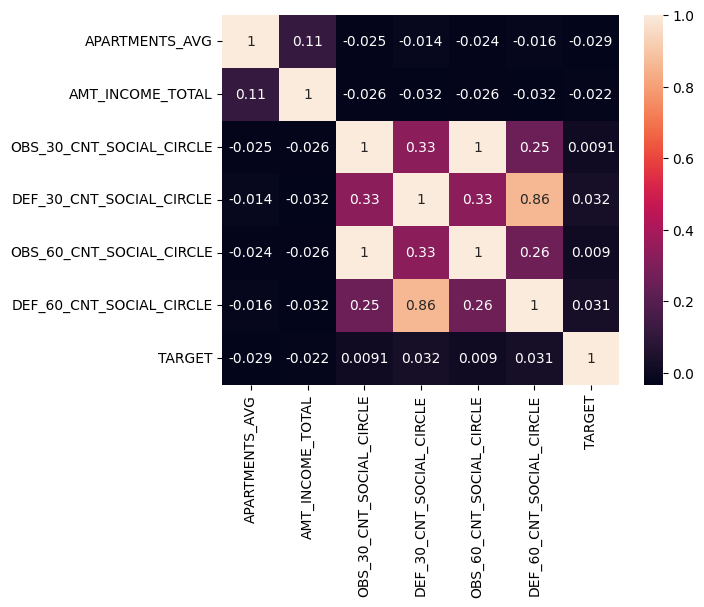

In [ ]:
import seaborn as sns
sns.heatmap(df[columns].corr(),annot=True)

In [ ]:
abs(df[columns].corr()["TARGET"])<0.6

<ipython-input-5-0e457193374e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df[columns].corr()["TARGET"])<0.6


APARTMENTS_AVG               True
AMT_INCOME_TOTAL             True
OBS_30_CNT_SOCIAL_CIRCLE     True
DEF_30_CNT_SOCIAL_CIRCLE     True
OBS_60_CNT_SOCIAL_CIRCLE     True
DEF_60_CNT_SOCIAL_CIRCLE     True
TARGET                      False
Name: TARGET, dtype: bool

In [ ]:
# checking for multicollinarity

<Axes: >

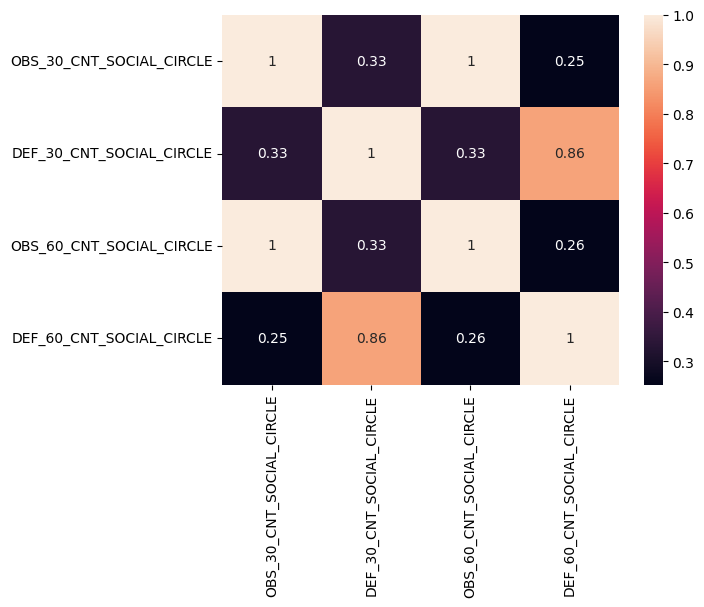

In [ ]:
sns.heatmap(df[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]].corr(),annot=True)

# keeping ["OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE"] makes sense

In [ ]:
columns_to_drop = ["OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]
df = df.drop(columns=columns_to_drop)

In [ ]:
columns=["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","FLAG_OWN_REALTY","OCCUPATION_TYPE","ORGANIZATION_TYPE","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE"]
df[columns]

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_OWN_REALTY,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE
0,2.0,2.0,Y,Laborers,Business Entity Type 3,202500.0,Secondary / secondary special
1,1.0,0.0,N,Core staff,School,270000.0,Higher education
2,0.0,0.0,Y,Laborers,Government,67500.0,Secondary / secondary special
3,2.0,0.0,Y,Laborers,Business Entity Type 3,135000.0,Secondary / secondary special
4,0.0,0.0,Y,Core staff,Other,121500.0,Secondary / secondary special
...,...,...,...,...,...,...,...
307287,0.0,0.0,N,Sales staff,Services,157500.0,Secondary / secondary special
307288,0.0,0.0,Y,Cleaning staff,XNA,72000.0,Secondary / secondary special
307289,6.0,0.0,Y,Managers,School,153000.0,Higher education
307290,0.0,0.0,Y,Laborers,Business Entity Type 1,171000.0,Secondary / secondary special


In [ ]:
df[columns].isnull().sum()/df.shape[0]

OBS_30_CNT_SOCIAL_CIRCLE    0.003313
DEF_30_CNT_SOCIAL_CIRCLE    0.003313
FLAG_OWN_REALTY             0.000000
OCCUPATION_TYPE             0.000000
ORGANIZATION_TYPE           0.000000
AMT_INCOME_TOTAL            0.000000
NAME_EDUCATION_TYPE         0.000000
dtype: float64

In [ ]:
df["OBS_30_CNT_SOCIAL_CIRCLE"]

0         2.0
1         1.0
2         0.0
3         2.0
4         0.0
         ... 
307287    0.0
307288    0.0
307289    6.0
307290    0.0
307291    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, Length: 307292, dtype: float64

In [ ]:
df_filtered=df[columns].copy()
df_filtered.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_OWN_REALTY,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE
0,2.0,2.0,Y,Laborers,Business Entity Type 3,202500.0,Secondary / secondary special
1,1.0,0.0,N,Core staff,School,270000.0,Higher education
2,0.0,0.0,Y,Laborers,Government,67500.0,Secondary / secondary special
3,2.0,0.0,Y,Laborers,Business Entity Type 3,135000.0,Secondary / secondary special
4,0.0,0.0,Y,Core staff,Other,121500.0,Secondary / secondary special


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df_filtered.select_dtypes(include='object').columns:
    df_filtered[column] = label_encoder.fit_transform(df_filtered[column])

df_filtered.head()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_OWN_REALTY,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE
0,2.0,2.0,1,8,5,202500.0,3
1,1.0,0.0,0,3,34,270000.0,0
2,0.0,0.0,1,8,11,67500.0,3
3,2.0,0.0,1,8,5,135000.0,3
4,0.0,0.0,1,3,29,121500.0,3


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
df_missing = df_filtered[df_filtered['OBS_30_CNT_SOCIAL_CIRCLE'].isnull()]
df_not_missing = df_filtered.dropna()


X_train = df_not_missing.drop("OBS_30_CNT_SOCIAL_CIRCLE",axis=1)
X_train = X_train.drop("DEF_30_CNT_SOCIAL_CIRCLE",axis=1)
y_train = df_not_missing['OBS_30_CNT_SOCIAL_CIRCLE']

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train.head()

,OBS_30_CNT_SOCIAL_CIRCLE,FLAG_OWN_REALTY,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE
0,2.0,1,8,5,202500.0,3
1,1.0,0,3,34,270000.0,0
2,0.0,1,8,11,67500.0,3
3,2.0,1,8,5,135000.0,3
4,0.0,1,3,29,121500.0,3


In [ ]:
X_missing.isnull().sum()*100/len(X_missing)

FLAG_OWN_REALTY        0.0
OCCUPATION_TYPE        0.0
ORGANIZATION_TYPE      0.0
AMT_INCOME_TOTAL       0.0
NAME_EDUCATION_TYPE    0.0
dtype: float64

In [ ]:
X_missing = df_missing.drop("OBS_30_CNT_SOCIAL_CIRCLE",axis=1)
X_missing = X_missing.drop("DEF_30_CNT_SOCIAL_CIRCLE",axis=1)

In [ ]:
predicted_values = linear_reg_model.predict(X_missing)

In [ ]:
y_train

0         2.0
1         1.0
2         0.0
3         2.0
4         0.0
         ... 
307287    0.0
307288    0.0
307289    6.0
307290    0.0
307291    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, Length: 306274, dtype: float64

In [ ]:
result = np.concatenate([y_train, predicted_values])
len(result)
rounded_array = np.rint(result).astype(int)

In [ ]:
df['OBS_30_CNT_SOCIAL_CIRCLE']=rounded_array

In [ ]:
df_missing = df_filtered[df_filtered['OBS_30_CNT_SOCIAL_CIRCLE'].isnull()]
df_not_missing = df_filtered.dropna()


X_train = df_not_missing.drop("OBS_30_CNT_SOCIAL_CIRCLE",axis=1)
X_train = X_train.drop("DEF_30_CNT_SOCIAL_CIRCLE",axis=1)
y_train = df_not_missing['DEF_30_CNT_SOCIAL_CIRCLE']

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_missing = df_missing.drop("OBS_30_CNT_SOCIAL_CIRCLE",axis=1)
X_missing = X_missing.drop("DEF_30_CNT_SOCIAL_CIRCLE",axis=1)

In [ ]:
predicted_values = linear_reg_model.predict(X_missing)

In [ ]:
result = np.concatenate([y_train, predicted_values])
len(result)
rounded_array = np.rint(result).astype(int)

In [ ]:
df['DEF_30_CNT_SOCIAL_CIRCLE']=rounded_array

In [ ]:
missing_threshold_min = 1  # Greater than 0
missing_threshold_max = 0.15 * len(df)
columns_with_missing = df.columns[(df.isnull().sum() > missing_threshold_min) & (df.isnull().sum() < missing_threshold_max)].tolist()

print("Columns with missing values greater than 0 but less than 10%:")
print(columns_with_missing)

Columns with missing values greater than 0 but less than 10%:
['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']


In [ ]:
(df[columns_with_missing].isnull().sum()/df.shape[0]*100).sort_values(ascending = False).head(50)

AMT_GOODS_PRICE    0.090468
AMT_ANNUITY        0.003905
CNT_FAM_MEMBERS    0.000651
dtype: float64

In [ ]:
df.drop("FLAG_OWN_CAR",axis=1,inplace=True)

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307287,456251,0,Cash loans,M,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0.5,0.0,0.0,0.0,0.0,2.5
307288,456252,0,Cash loans,F,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.5
307289,456253,0,Cash loans,F,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307290,456254,1,Cash loans,F,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/5_CNT_SOCIAL_CIRCLE.csv")

# CNT_FAM_MEMBERS

In [19]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/5_CNT_SOCIAL_CIRCLE.csv")
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5
4,4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
missing_threshold_min = 1
missing_threshold_max = 0.15 * len(df)
columns_with_missing = df.columns[(df.isnull().sum() > missing_threshold_min) & (df.isnull().sum() < missing_threshold_max)].tolist()

print("Columns with missing values greater than 0 but less than 10%:")
print(columns_with_missing)

Columns with missing values greater than 0 but less than 10%:
['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']


In [21]:
(df[columns_with_missing].isnull().sum()).sort_values(ascending = False).head(50)

AMT_GOODS_PRICE    278
AMT_ANNUITY         12
CNT_FAM_MEMBERS      2
dtype: int64

<ipython-input-22-0e0f9aad6731>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AMT_GOODS_PRICE"])


<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

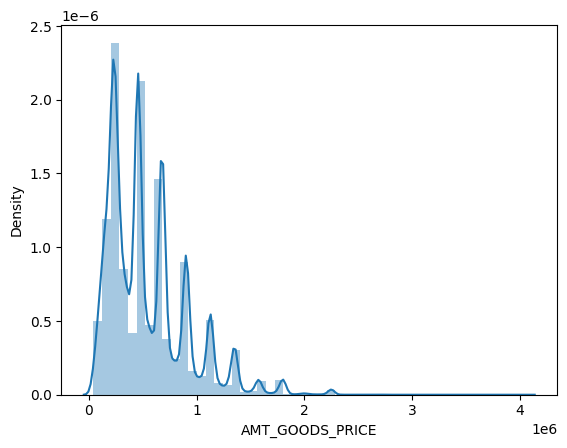

In [22]:
import seaborn as sns
sns.distplot(df["AMT_GOODS_PRICE"])

In [23]:
df["AMT_GOODS_PRICE"].skew()

1.348556031798438

In [24]:
df["AMT_GOODS_PRICE"]=df["AMT_GOODS_PRICE"].fillna(df["AMT_GOODS_PRICE"].median())
df["AMT_GOODS_PRICE"].isnull().sum()

0

# AMT_ANNUITY

In [25]:
missing_threshold_min = 1
missing_threshold_max = 0.15 * len(df)
columns_with_missing = df.columns[(df.isnull().sum() > missing_threshold_min) & (df.isnull().sum() < missing_threshold_max)].tolist()

print("Columns with missing values greater than 0 but less than 10%:")
print(columns_with_missing)

Columns with missing values greater than 0 but less than 10%:
['AMT_ANNUITY', 'CNT_FAM_MEMBERS']


In [26]:
(df[columns_with_missing].isnull().sum()).sort_values(ascending = False).head(50)

AMT_ANNUITY        12
CNT_FAM_MEMBERS     2
dtype: int64

In [27]:
df["AMT_ANNUITY"].skew()

1.5730355914804255

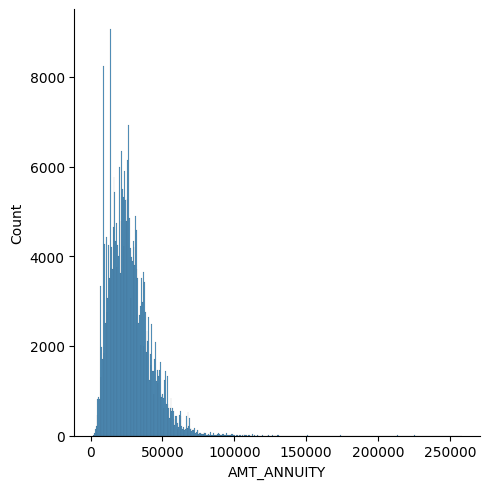

In [28]:
sns.displot(df["AMT_ANNUITY"])

In [29]:
df["AMT_ANNUITY"].skew()

1.5730355914804255

In [30]:
df["AMT_ANNUITY"]=df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].median())

# CNT_FAM_MEMBERS

In [31]:
missing_threshold_min = 1
missing_threshold_max = 0.15 * len(df)
columns_with_missing = df.columns[(df.isnull().sum() > missing_threshold_min) & (df.isnull().sum() < missing_threshold_max)].tolist()

print("Columns with missing values greater than 0 but less than 10%:")
print(columns_with_missing)

Columns with missing values greater than 0 but less than 10%:
['CNT_FAM_MEMBERS']


In [32]:
df[columns_with_missing].isnull().sum()

CNT_FAM_MEMBERS    2
dtype: int64

<ipython-input-33-e21e1a7d1bea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CNT_FAM_MEMBERS"])


<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='Density'>

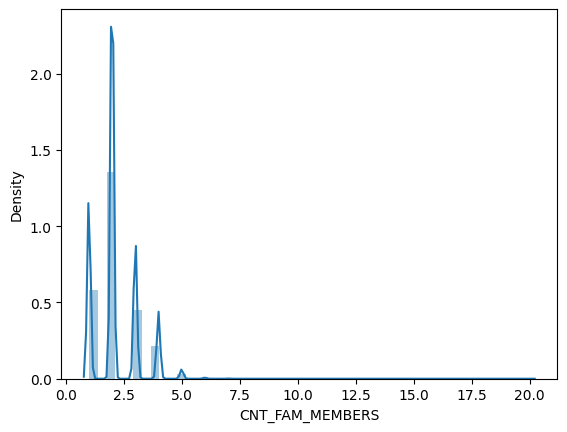

In [33]:
sns.distplot(df["CNT_FAM_MEMBERS"])

In [34]:
df["CNT_FAM_MEMBERS"].skew()

0.9873267930047802

In [40]:
df["CNT_FAM_MEMBERS"].median()

2.0

In [41]:
df["CNT_FAM_MEMBERS"]=df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].median())

In [42]:
missing_threshold_min = 1
missing_threshold_max = 0.15 * len(df)
columns_with_missing = df.columns[(df.isnull().sum() > missing_threshold_min) & (df.isnull().sum() < missing_threshold_max)].tolist()

print("Columns with missing values greater than 0 but less than 10%:")
print(columns_with_missing)

Columns with missing values greater than 0 but less than 10%:
[]


In [43]:
df.to_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/6_CNT_FAM_MEMBERS.csv")